# DAV 6150 Project 1 - Regression for Numeric Data
Ke Chen, Brian Livian, Alejandra Zapata

## 1. Introduction
The Module 3 wine data set with many of the attributes being related to the chemical composition will be used as training data set for prediction model creation. <br>
<br>
According to the given data set profiling table, total 16 attributes were recorded, which is the same as Module 3. The attributes include AcidIndex, Alcohol, Chlorides, CitricAcid, Density, FixedAcidity, FreeSulfurDioxide, LabelAppeal, ResidualSugar, STARS, Sulphates, TotalSulfurDioxide, VolatileAcidity and pH as the explanatory variables. The TARGET will be the response variable. Also, the INDEX will be taken as unique ID.<br>
<br>
The data cleaning plan will be summarized as:
- Step 1-4 will be fixed on the Module 3 work.
- 1. Import the data set and apply exploratory data analysis (EDA). The EDA will mainly focus on detecting the missing values and outliers. 
- 2. Based on the EDA result, investigate the original data set, and apply drop or filling rows and/or columns.
- 3. Create new or transform the attributes if needed based on the EDA.
- 4. Re-run the EDA to ensure the data is well prepared for subsequent modeling.
- Step 5-6 will follow up the Module 3 work.
- 5. Apply the selected feature groups (PCA and Backward Elimination selected features) on different models.
- 6. Get results of the models' performance and apply model on the testing data set. 

In [2]:
# import pandas libraries for dataframe loading
import pandas as pd
# read data into dataframe
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M3_Data.csv')
# check loading
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


## 2. Exploratory Data Analysis

In [3]:
# get the basic data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

According to the basic information above, total 12795 records were found in this data set. 4 attributes contain integer data, while the other 12 attributes contain float data. As the non-null values counts are not 12795 in all attributes, there must be missing values in certain columns.

In [4]:
# checking missing values in each column
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

There are 8 attributes containing missing values. They are all float data columns. For intuitively seeing the portion and randomness of the missing values. The bar plot and heatmap could be created as below.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)


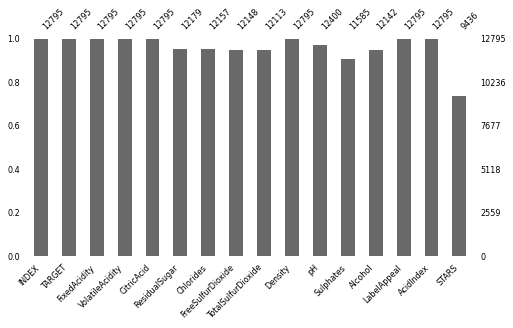

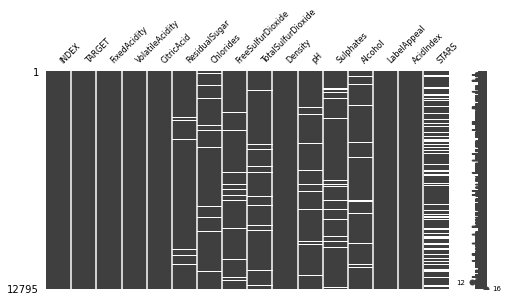

In [5]:
# import msno for cheking missing
import missingno as msno
# plot bar plot of missing values
print (msno.bar(df,figsize=(8, 4), fontsize=8))
# plot box plot of missing values
print (msno.matrix(df,figsize=(8, 4), fontsize=8))

The columns ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates and Alcohol do not have a small portion of missing values, while attribute STAR contains relatively large portion of missing values, which is almost 25% of the whole column. Also, the heatmap does not show any regular missing data pattern, therefore the missing values could be taken as missing as random. <br><br>
Before acting with the missing values, the basic descriptive values and attribute pattern of the original dataset need to be checked.

In [6]:
# statistical values
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


It is also important to have overview of each column and understand the outliers as well. The distribution of each column will be shown as the following graphs. The INDEX column will not be analyzed as it will not be concluded in the prediction model. The other 3 integer type attributes can also be applied with histograms. The graph will show bar plot shape as the data are discrete.

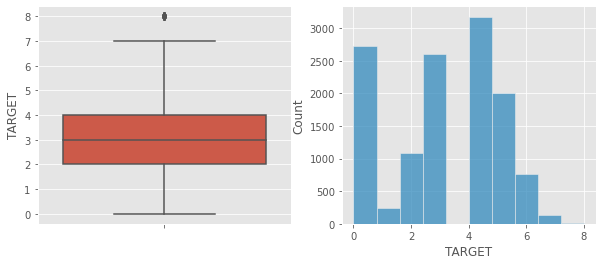

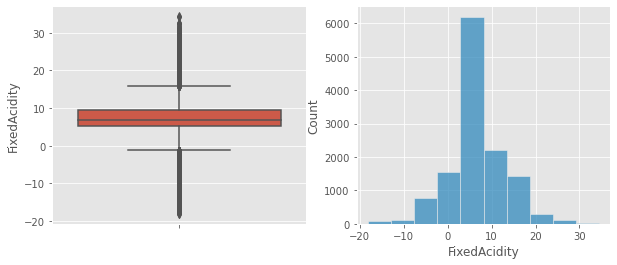

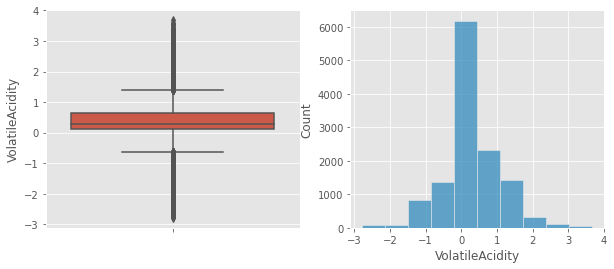

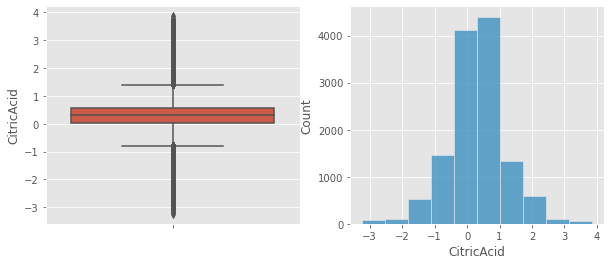

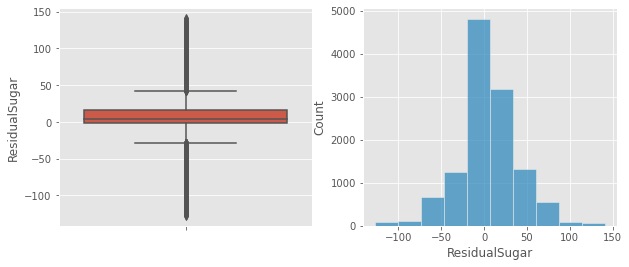

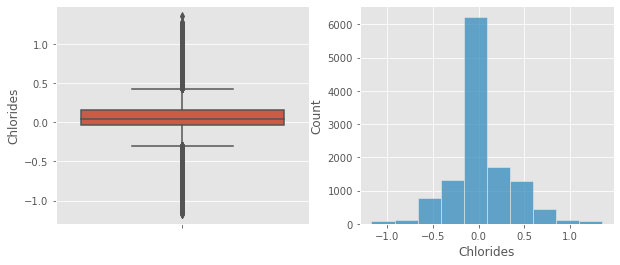

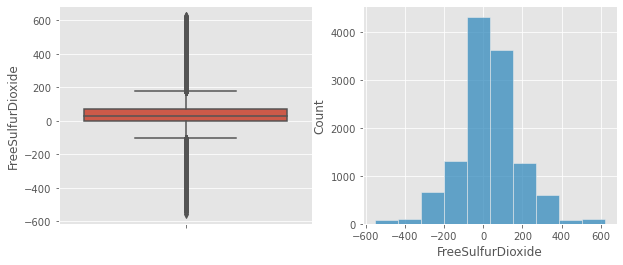

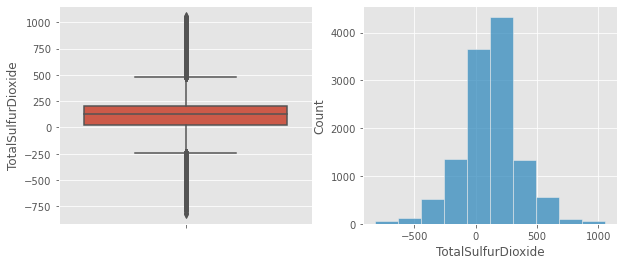

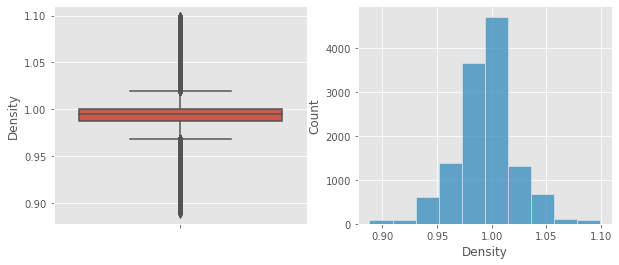

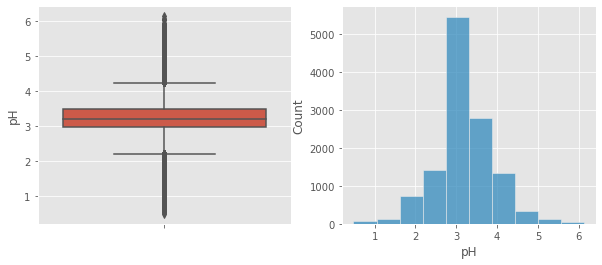

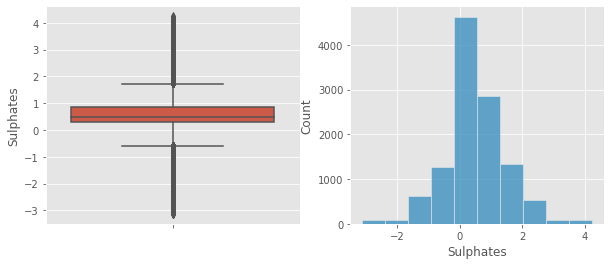

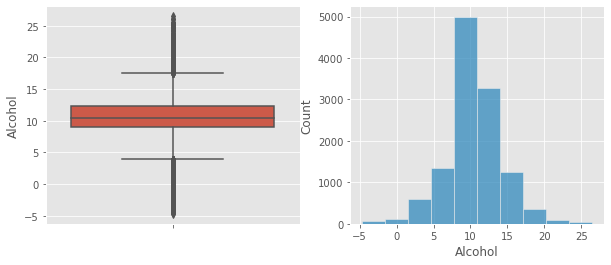

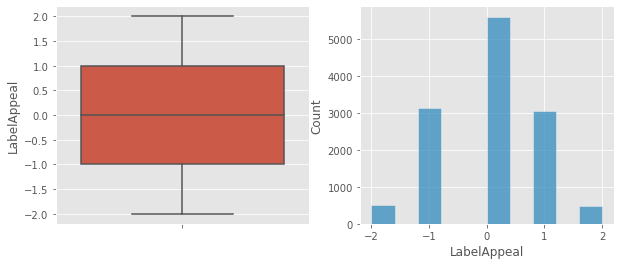

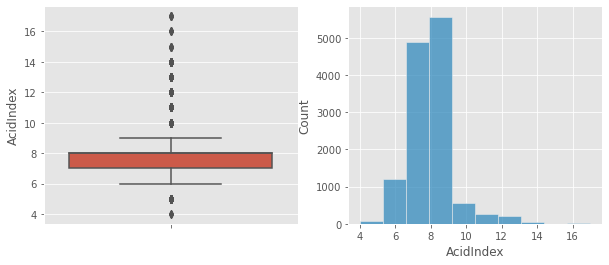

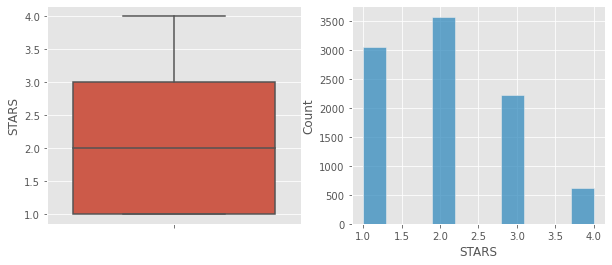

In [7]:
# import libraries for plotting
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot histograms and box plot of each attribute
for i in df.iloc[:,1:].columns:
    fig, axes = plt.subplots(1, 2,figsize=(10,4))
    sns.boxplot(ax=axes[0], y = i, data = df,orient='v')
    sns.histplot(data=df, ax=axes[1], x = i, bins=10)

From the EDA information above, we can conclude that:

Index: Index is an attribute indexing each observation. It is not necessary for data analysis and will be removed in the data preparation section.

Target: This attribute indicates the number of cases of wine sold. It is a discrete numeric variable with a mean of about 3. A histogram/ bar plot shows a slight right skew, with the mode being 4 cases sold. However, many wines had 0 cases sold, which skews the mean to 3. The boxplot indicates the mean of 3, with an interquartile range of 2-4.

Fixed Acidity: This attribute describes the fixed or nonvolatile acid of a wine (does not evaporate). It includes acids such as: tartaric, malic, citric, and succinic. The ranges of acidity each of these acids tend to be: 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid. The histogram the data frame shows the majority of wines have a fixed acidity of about 7, with a standard deviation of 6.31. Fixed acidity is on a range of [-18.1, 34.3]. The box plot shows a thin interquartile range on [5.2, 9.5], with many outliers. This attribute will require scaling to reflect a more accurate distribution based on domain knowledge.

Volatile Acidity: This attribute describes the volatile acid content of the wine. It is on the range [-2.79, 3.68], with a mean of 0.32 and standard deviation of 0.78. This attribute is not reliable, the average volatile acid concentration is 400 mg/L with a range of [0, 3 g/L]. This attribute will require feature engineering to correct the distribution. The histogram shows that most wine's volatile acidity falls near its mean. The boxplot shows a thin interquartile range of [0.13, 0.64].

Citric Acid: Citric Acid content of wine. This attribute has a mean of 0.31. Like other attributes, the histogram shows most of the data falls near the mean. The boxplot shows an interquartile range of [0.03, 0.58]. Similar to other attributes, there are many outliers shown in the boxplot. Citric acid should have a range of 0 - 500 mg/ L, thus this attribute requires scaling and feature engineering.

Residual Sugar: Residual sugar content of the wine. This attribute has a mean of .05, median of 3.9, standard deviation of 33.7. Like other attributes, this histogram shows most wines have residual sugars near the mean, with outliers on both ends of the histogram. This attribute is not reliable for a couple of reasons: residual sugar cannot be below zero, and residual sugar of wines typical fall between the range of 10 - 35 g / L. The boxplot shows an interquartile range of [-2.0, 15.9], with outliers lying outside the boxplot.

Chlorides: Chloride content of wine. This attribute has a mean of .054, median of .046, standard deviation of 0.32. Like other attributes, the histogram shows most wines having a chloride near the mean, with a few datapoints falling far outside the standard deviation on both ends of the histogram. The boxplot (IQR [-.03, .15]) reflects the histogram, showing outliers falling outside the boxplot. This attribute will have to be scaled so that the minimum chloride level does not fall below 0.
Free Sulfur Dioxide: Sulfur dioxide content of wine. This has a mean of 30.8, median of 30.0, standard deviation of 148.7. The histogram shows most wines have sulfur dioxide near the mean, with outliers falling far outside the standard deviation on both ends of the histogram. This attribute is not reliable because free sulfur dioxide must be above 0, and typically has a maximum of 79 parts per million. This attribute will have to be feature engineered to fit this scale. The boxplot has and IQR of [0, 70], also showing outliers.

Total Sulfur Dioxide: This attribute measures total sulfur dioxide of the wine. This attribute has a mean of 120.7, median of 123, standard deviation of 231.9. The histogram shows outliers far outside the standard deviation on both sides, with most of the data falling near the mean. The boxplot shows an IQR of [27, 208], with outliers falling outside of the boxplot. This attribute will require feature engineering and scaling similar to Free Sulfur Dioxide.

Density: This attribute has a mean of .99, median of .99, standard deviation of .027. This attribute has outliers, however, based on my domain knowledge, this attribute is reliable. The outliers can be seen in through the boxplot as well.
pH: pH is a measure the acidity of wine on a logarithmic scale. In this dataset it has a minimum of .48 and maximum of 6.13. pH is measure on a scale of 0-14, with values less than 7 being acidic. The histogram shows a mean of 3.2. The boxplot shows outliers in this attribute. However, this data looks reliable based on the definition of pH.

Sulphates: Sulphates is a chemical that helps preserve wine. Typically, it has a range of 5 mg/L (5 parts per million) to about 200 mg/L. This dataset shows a range of -3.13 to 4.24. Thus, the data is not reliable and requires scaling / feature engineering. The histogram shows a mean of .527. The boxplot shows outliers in this attribute that will be removed in the feature engineering.

Alcohol: This attribute seems to be in the unit of percent alcohol (ABV). It is similar to typical range of wine 15.5% to 25% ABV, with an average of 18%. However, this dataset has negative alcohol ABV values which must be taken into account in the feature engineering (seen in the histogram). The boxplot shows there are outliers in the alcohol attribute.
The continuous variables are mostly showing a symmetric and unimodal distribution, some are centered around 0. Assuming the data were mistakenly added dash signs and/or with meanings, in the next section, we will use the absolute values of them. It is not wise to created more summarized features with the transformed data, such as Total Acidity, since the purely addition might hide some useful information.

The integer variables, such as the LabelAppeal, AcidIndex and STARS show separate bars, as they are discrete. According to the data profiling information, LabelAppeal and STARS are supposed to be an ordinal categorial data. Missing values for STARS are no rating by experts.

In order to look at the linear correlation between each variable, the heatmap will be created. It will benefit to our decision on dealing with the missing values and attributes selection.

AxesSubplot(0.125,0.125;0.62x0.755)


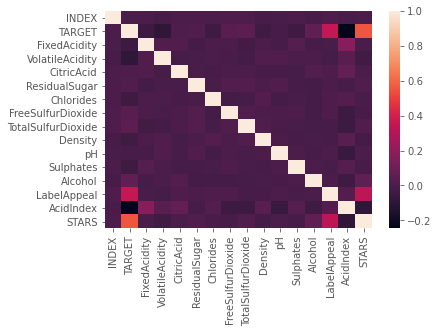

In [8]:
# for importing seaborn
import seaborn as sns
print(sns.heatmap(df.corr()))

Most variables show weak or no linear correlation to each other at all. Only the response variable TARGET and independent variable STARS shows moderate positive correlation. Therefore, STARS needs to be taken as a very important variable in this case.

## 3. Data Preparation
### 3.1 Dropping Columns and Absolute Values Conversion
Based on the information getting from EDA, the INDEX column could be dropped as it is not related to the model creation. 

In [9]:
# drop the INDEX column
df_new=df.iloc[:,1:]
# check imputation
df_new.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [10]:
# all negative values on numeric variables to positive values
df_numeric = df_new.drop(columns=['TARGET','LabelAppeal','STARS']).abs()
# extract ordinal categorical variables
df_categoric = df_new[['LabelAppeal','STARS']]
# set aside the target variable
df_target=df_new[['TARGET']]

### 3.2 Imputing Missing Values
The missing values of STARS column, which is moderate positively correlated with the response variable TARGET, cannot be  deleted or imputed arbitrarily. Also, almost 1/4 of the data were missing. As the meaning of missing values is not rated, we will fill the missing values as 0 for no contribution for the rating.

In [12]:
import warnings
warnings.filterwarnings('ignore')
# fill in missing values of STARS column
df_categoric['STARS']=df_categoric['STARS'].fillna(0)

For other numeric data, if the missing values are simply imputed with the mean, median or mode, they will be in the largest cluster of center range. To make the imputation more meaningful, the k-nearest neighbors (KNN) algorithm will be applied to impute the missing. Avoiding overfitting and too arbitrary, 5 will be selected as the number of neighbors.

In [13]:
# import library
from sklearn.impute import KNNImputer
# set the imputer
imputer = KNNImputer(n_neighbors=5)
# fill in the missings and convert to dataframe again
df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric),columns = df_numeric.columns)
# concatenate the frames into the original shape 
df_filled=pd.concat([df_target,df_numeric, df_categoric], axis=1)
# sanity check
df_filled.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,AcidIndex,LabelAppeal,STARS
0,3,3.2,1.160,0.98,54.2,0.5670,62.0,268.0,0.99280,3.33,0.59,9.90,8.0,0,2.0
1,3,4.5,0.160,0.81,26.1,0.4250,15.0,327.0,1.02792,3.38,0.70,12.47,7.0,-1,3.0
2,5,7.1,2.640,0.88,14.8,0.0370,214.0,142.0,0.99518,3.12,0.48,22.00,8.0,-1,3.0
3,3,5.7,0.385,0.04,18.8,0.4250,22.0,115.0,0.99640,2.24,1.83,6.20,6.0,-1,1.0
4,4,8.0,0.330,1.26,9.4,0.1262,167.0,108.0,0.99457,3.12,1.77,13.70,9.0,0,2.0


Missing values have been imputed. 

### 3.3 Data Normalization
After fixing the data, most of the numeric variables will become right skewed shape because of the absolute values folded from the negative side to the positive side. For better performance of the modeling, we will normalize the variables which shows obvious skewed distribution.

In [14]:
# normalize the skewed variables
from sklearn.preprocessing import power_transform
df_filled[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Sulphates','AcidIndex']]=power_transform(df_filled[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Sulphates','AcidIndex']])

## 4. Prepped Data Review

In [15]:
# checking missing values in each column again
df_filled.isnull().sum()

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
AcidIndex             0
LabelAppeal           0
STARS                 0
dtype: int64

No missing value found.

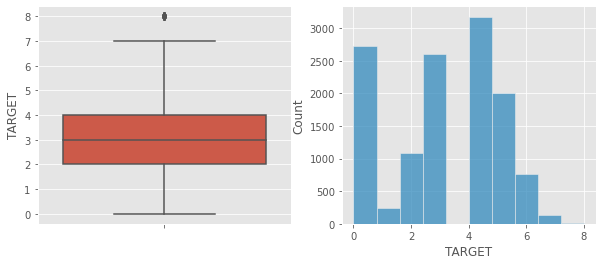

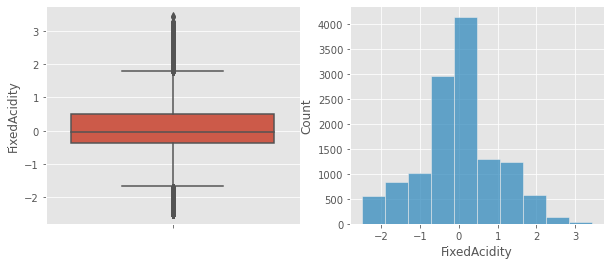

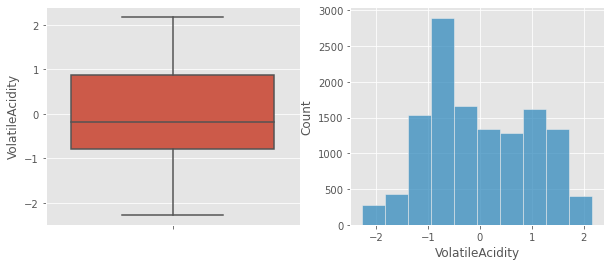

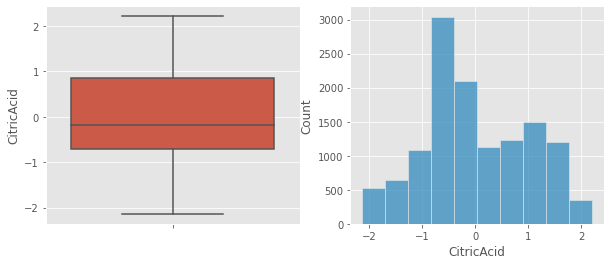

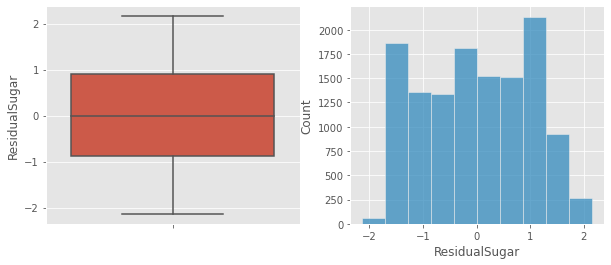

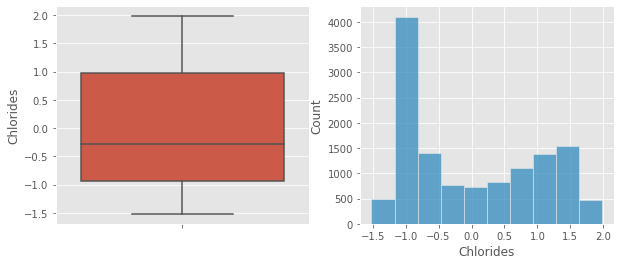

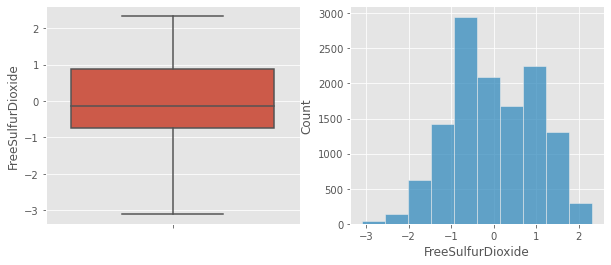

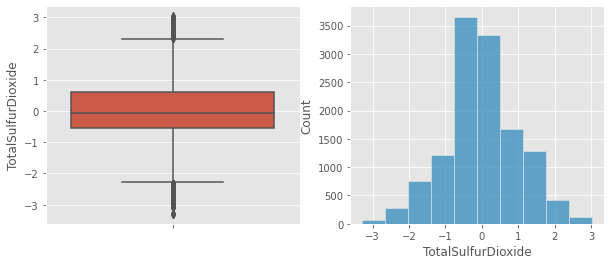

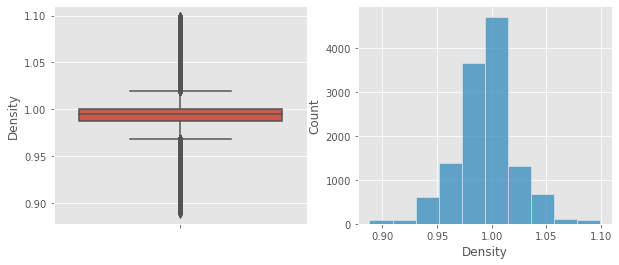

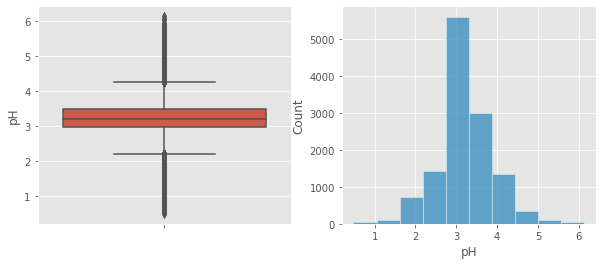

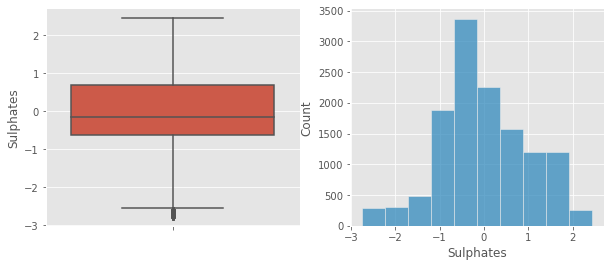

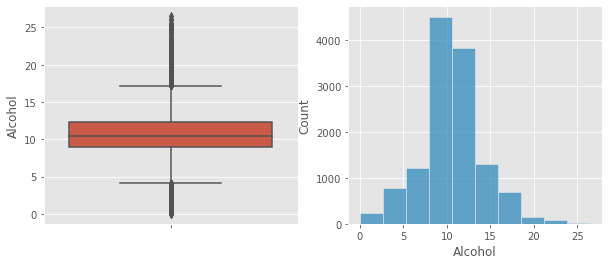

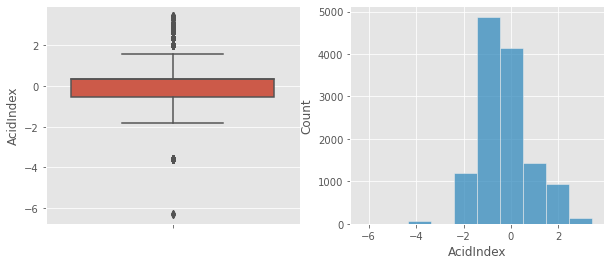

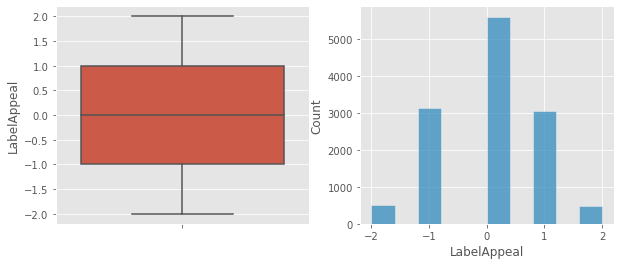

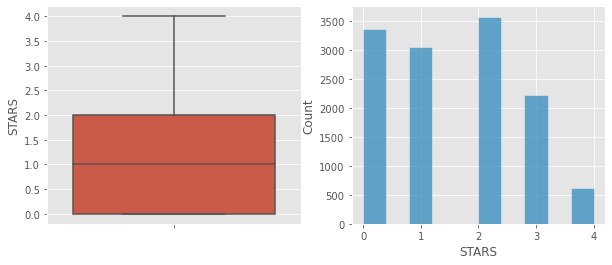

In [16]:
# plotting the manipulated numeric data again
for i in df_filled.iloc[:,:15].columns:
    fig, axes = plt.subplots(1, 2,figsize=(10,4))
    sns.boxplot(ax=axes[0], y = i, data = df_filled,orient='v')
    sns.histplot(data=df_filled, ax=axes[1], x = i, bins=10)

After fixing the data, most of the numeric variables become right skewed shape. For better performance of the modeling, we will normalize the variables which shows obvious skewed distribution.

Re-run the correlation of prepared data. The correlation coefficient does not change much.

AxesSubplot(0.125,0.125;0.62x0.755)


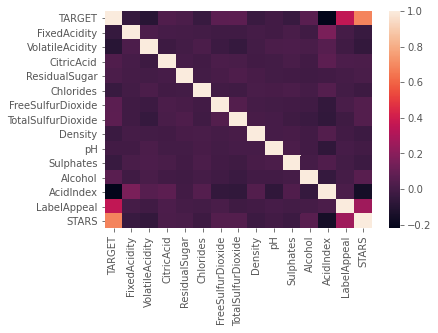

In [17]:
# for printing heatmap
print(sns.heatmap(df_filled.corr()))

## 5. Regression Modeling
In this section, two types of feature engineering and/or dimensionality reductions methods will be used. Firstly, backward elimination will be used for selecting features, and secondly, PCA will be used for dimensionality reduction. For each situation, 3 models will be tried to use for evaluating the prediction performance. The three models include Poisson regression, negative binomial regression, and multiple linear regression.

In [18]:
# Compare the mean and variance for the response variable
print(df_filled['TARGET'].mean())
print(df_filled['TARGET'].var())

3.0290738569753812
3.710894522839082


### 5.1 Three Models by Feature Selection
As the Module 3 data set will be used as training set, the explanatory variables and response variables will be divided as X and y for model selection.

In [19]:
# indicating explanatory variables and response variables
X=df_filled[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Density','pH','Sulphates','Alcohol','AcidIndex','LabelAppeal','STARS']]
y=df_filled['TARGET']

Using backward elimination to automatically select possible features, which contribute more to the model creating.

In [20]:
'''**********************************
Original code cited from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
*************************************'''
import statsmodels.api as sm
# Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_0 = X[cols]
    # sm requires that have an additional variable with a constant of one
    X_0 = sm.add_constant(X_0)
    model = sm.OLS(y,X_0).fit()
    # selects all as feature variables
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    # iterates and removes variables that are not a good fit
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['VolatileAcidity', 'CitricAcid', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'Sulphates', 'Alcohol', 'AcidIndex', 'LabelAppeal', 'STARS']


As the result shows, even we applied feature selection, there are still 11 candidate variables. The three models will be based on the 11 candidate variables.
#### 5.1.1 Multiple Linear Regression

In [21]:
# prepare the explanatory variables and response variable
X_1=df_filled[['VolatileAcidity', 'CitricAcid', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'Sulphates', 'Alcohol', 'AcidIndex', 'LabelAppeal', 'STARS']]
y=df_filled['TARGET']

# import the train_test_split function
from sklearn.model_selection import train_test_split
# split the data into training and testing
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y, test_size=0.2)

In [22]:
from patsy import dmatrices
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score

# Apply the linear regression model on the selected features 
linear_reg_1 = sm.OLS(y_1_train, X_1_train).fit()
# predict on the testing group
y_1_pred_1= round(linear_reg_1.predict(X_1_test))
# print model summary
print(linear_reg_1.summary())

from sklearn.metrics import mean_squared_error
a=mean_squared_error(y_1_pred_1,y_1_test)
# the RMSE of model
np.sqrt(a)

                                 OLS Regression Results                                
Dep. Variable:                 TARGET   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              5821.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:53:12   Log-Likelihood:                         -17481.
No. Observations:               10236   AIC:                                  3.498e+04
Df Residuals:                   10225   BIC:                                  3.506e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

1.3307908545500764

From the training set R-squared value 0.863, we can see the model fit the training data pretty well. The Root Mean Square Error of testing data is 1.35, which is pretty good. However, as linear regression is not the best way for count data prediction, therefore, we can hold this model and attempting other types of models.

#### 5.1.2 Poisson Regression
As the response variable has different mean and variance, Poisson regression might not be suitable. However, we will do a comparison after applying all models.

In [23]:
# https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958
import statsmodels.api as sm

# Fit poisson model to the selected features
poi_reg_1 = sm.GLM(y_1_train, X_1_train, family=sm.families.Poisson()).fit()

y_1_pred_2= round(poi_reg_1.predict(X_1_test))
# print the model summary
print(poi_reg_1.summary())

# the RMSE of model
b=mean_squared_error(y_1_pred_2,y_1_test)
np.sqrt(b)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                10236
Model:                            GLM   Df Residuals:                    10225
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18762.
Date:                Sun, 27 Jun 2021   Deviance:                       11888.
Time:                        21:53:14   Pearson chi2:                 8.76e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
VolatileAcidity       -0.0251      0

1.4201420488258554

The p-value of the model could be calculated by the deviance and the Chi-square of Df Residuals. By checking the P-value from Chi-Square calculator, the p-value is less than 0.00001, the result is significant at p < 0.05. Therefore, the predicted values do have significant difference with the actual values distribution. It is not a good choice, as our previous guessing, even though the Root Mean Square Error is not show extremely large value.

#### 5.1.3 Negative Binomial Regression

In [24]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

# apply formula based negative binomial regression model
# set the formula
formula = "TARGET ~ VolatileAcidity+CitricAcid+Chlorides+FreeSulfurDioxide+TotalSulfurDioxide+Density+Sulphates+Alcohol+AcidIndex+LabelAppeal+STARS"
# fit the model in the selected variables
nb_reg_1 = smf.glm(formula, data=pd.concat([y_1_train,X_1_train], axis=1), family=sm.families.NegativeBinomial()).fit()
# print the summary
print(nb_reg_1.summary())
y_1_pred_3= round(nb_reg_1.predict(X_1_test))

# the RMSE of model
c=mean_squared_error(y_1_pred_3,y_1_test)
np.sqrt(c)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                10236
Model:                            GLM   Df Residuals:                    10224
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22273.
Date:                Sun, 27 Jun 2021   Deviance:                       5430.2
Time:                        21:53:15   Pearson chi2:                 3.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7039      0

1.4584247445252472

By checking the P-value from Chi-Square calculator, the p-value is 1. The result is not significant at p < 0.05. Therefore, the predicted values do not have significant difference with the actual values distribution. This model is a good candidate. However, the Root Mean Square Error is slightly larger than the previous 2 models. STARS and Density are the variables contribute more on the model because of the larger coefficient.

### 5.2 Three Models by Principal Components Analysis
We reduce the dimension given numeric inputs for 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'AcidIndex'.

After testing multiple principal components, we found that 9 principal components is adequately reduces the dimensionality of the dataset, while explaining for 69.4% of the variance. Reducing dimensionality more would decrease the explained variance significantly, while increasing the dimensionality greater than 9 would produce too high of a high dimension.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standarize the variables
sc = StandardScaler()
X_pca_st = sc.fit_transform(X)

# create smaller size PCs as 9
pca = PCA(n_components = 9)

pca.fit(X_pca_st)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# import the train_test_split function
from sklearn.model_selection import train_test_split

X_2= pca.transform(X_pca_st)
y_2= y


# split the data into training and testing
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.2)

[0.09973347 0.08380197 0.07908524 0.0741588  0.07228973 0.07165894
 0.07050511 0.07001357 0.06967882]
0.6909256638138604


#### 5.2.1 Multiple Linear Regression

In [26]:
# Apply the linear regression model on the PCs
linear_reg_2 = sm.OLS(y_2_train, X_2_train).fit()
# predict on the testing group
y_2_pred_1= linear_reg_2.predict(X_2_test)
# print model summary
print(linear_reg_2.summary())

# the RMSE of model
d=mean_squared_error(y_2_pred_1,y_2_test)
np.sqrt(d)

                                 OLS Regression Results                                
Dep. Variable:                 TARGET   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.129
Method:                 Least Squares   F-statistic:                              169.7
Date:                Sun, 27 Jun 2021   Prob (F-statistic):                   5.99e-301
Time:                        21:53:18   Log-Likelihood:                         -26885.
No. Observations:               10236   AIC:                                  5.379e+04
Df Residuals:                   10227   BIC:                                  5.385e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

3.316499422858685

Even though most of the time, PCA is a good choice for dimensionality reduction, in this model, obviously larger Root Mean Square Error than the selected features model on multiple linear regression model, as well as a small 0.134 can be seen.

#### 5.2.2 Poisson Regression

In [27]:
# https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958
import statsmodels.api as sm
# Fit poisson model given PCA/ standardized X training set, and y training set
poi_model_2 = sm.GLM(y_2_train, X_2_train, family=sm.families.Poisson()).fit()
y_2_pred_2= poi_model_2.predict(X_2_test)

print(poi_model_2.summary())

# the RMSE of model
e=mean_squared_error(y_2_pred_2,y_2_test)
np.sqrt(e)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                10236
Model:                            GLM   Df Residuals:                    10227
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28683.
Date:                Sun, 27 Jun 2021   Deviance:                       31768.
Time:                        21:53:20   Pearson chi2:                 6.06e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6814      0.006    120.129      0.0

2.228040436169398

#### 5.2.3 Negative Binomial Regression

In [28]:
# fit the model in the PCs
nb_reg_2 = sm.GLM(y_2_train, X_2_train, family=sm.families.NegativeBinomial()).fit()
y_2_pred_3=nb_reg_2.predict(X_2_test)

# print the summary
print(nb_reg_2.summary())

# the RMSE of model
f=mean_squared_error(y_2_pred_3,y_2_test)
np.sqrt(f)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                10236
Model:                            GLM   Df Residuals:                    10227
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26465.
Date:                Sun, 27 Jun 2021   Deviance:                       13884.
Time:                        21:53:21   Pearson chi2:                 3.09e+04
No. Iterations:                    57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5334      0.012     45.264      0.0

2.3368378159186536

The Poisson regression model and Negative Binomial regression model on principal components both have larger Root Mean Square Error. The p-value from Chi-Square testing for the model are both smaller than 0.05. Therefore, we can determine the models applied on the selected features have a general better performance than the PCA transformation.
## 6. Select Models
Considering the responsible variable represents the number of cases of wine that were purchased by wine distributors subsequent to their sampling each of the wines. It is a count data. The generalized linear model is preferable in this situation if the model does not show a terrible performance. However, the linear regression model also has good performance according to the RMSE and highest Log-Likelihood. Furthermore, the linear model has a strong R squared value of .86. Therefore, the multiple linear regression and the negative binomial regression models based on the backwards selection approach will be tried on the evaluation data set and compared the response variable 'TARGET'.

The evaluation data set will be cleaned as the training data set in Module 3, following the same procedure.

In [29]:
# read new project data set into dataframe
P1=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/Project1_Eval.csv')
# check loading
P1.head()

,IN,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,NaN,5.4,-0.860,0.27,-10.7,0.092,23.0,398.0,0.98527,5.02,0.64,12.30,-1,6,NaN
1,9,NaN,12.4,0.385,-0.76,-19.7,1.169,-37.0,68.0,0.99048,3.37,1.09,16.00,0,6,2.0
2,10,NaN,7.2,1.750,0.17,-33.0,0.065,9.0,76.0,1.04641,4.61,0.68,8.55,0,8,1.0
3,18,NaN,6.2,0.100,1.80,1.0,-0.179,104.0,89.0,0.98877,3.20,2.11,12.30,-1,8,1.0
4,21,NaN,11.4,0.210,0.28,1.2,0.038,70.0,53.0,1.02899,2.54,-0.07,4.80,0,10,NaN


In [30]:
# drop the INDEX column
P1_new=P1.iloc[:,1:]
# check imputation
P1_new.head()

# all negative values on numeric variables to positive values
P1_numeric = P1_new.drop(columns=['TARGET','LabelAppeal','STARS']).abs()
# extract ordinal categorical variables
P1_categoric = P1_new[['LabelAppeal','STARS']]
# set aside the target variable
P1_target=P1_new[['TARGET']]

In [31]:
# import library
from sklearn.impute import KNNImputer
# set the imputer
imputer = KNNImputer(n_neighbors=5)
# fill in the missings and convert to dataframe again
P1_numeric = pd.DataFrame(imputer.fit_transform(P1_numeric),columns = P1_numeric.columns)
# fill in missing values of STARS column
P1_categoric['STARS']=P1_categoric['STARS'].fillna(0)
# concatenate the frames into the original shape 
P1_filled=pd.concat([P1_target,P1_numeric, P1_categoric], axis=1)
# sanity check
P1_filled.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,AcidIndex,LabelAppeal,STARS
0,NaN,5.4,0.860,0.27,10.7,0.092,23.0,398.0,0.98527,5.02,0.64,12.30,6.0,-1,0.0
1,NaN,12.4,0.385,0.76,19.7,1.169,37.0,68.0,0.99048,3.37,1.09,16.00,6.0,0,2.0
2,NaN,7.2,1.750,0.17,33.0,0.065,9.0,76.0,1.04641,4.61,0.68,8.55,8.0,0,1.0
3,NaN,6.2,0.100,1.80,1.0,0.179,104.0,89.0,0.98877,3.20,2.11,12.30,8.0,-1,1.0
4,NaN,11.4,0.210,0.28,1.2,0.038,70.0,53.0,1.02899,2.54,0.07,4.80,10.0,0,0.0


In [32]:
# normalize the skewed variables
from sklearn.preprocessing import power_transform
P1_filled[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Sulphates','AcidIndex']]=power_transform(P1_filled[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Sulphates','AcidIndex']])

Now, all the explanatory variables are cleaned an imputed. The prediction could be made by the selected features.

In [33]:
# selected features matching the model
P1_filled[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Sulphates','AcidIndex','STARS']]=power_transform(P1_filled[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Sulphates','AcidIndex','STARS']])

In [34]:
# predict the TARGET by multiple linear regression model
predict = round(linear_reg_1.predict(P1_filled[['VolatileAcidity', 'CitricAcid', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 
                                      'Density', 'Sulphates', 'Alcohol', 'AcidIndex', 'LabelAppeal', 'STARS']]))
# checking null values
print(predict.isnull().sum())
print(len(predict))
# fill out he empty column
P1_filled['TARGET']=predict
P1_filled['TARGET'].min()

0
3335


-1.0

In [35]:
# predict the TARGET by negative binomial regression model
predict = round(nb_reg_1.predict(P1_filled[['VolatileAcidity', 'CitricAcid', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 
                                      'Density', 'Sulphates', 'Alcohol', 'AcidIndex', 'LabelAppeal', 'STARS']]))
# checking null values
print(predict.isnull().sum())
print(len(predict))
# fill out the empty column
P1_filled['TARGET']=predict
P1_filled['TARGET'].min()

0
3335


0.0

In [36]:
# check filling
P1_filled.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,AcidIndex,LabelAppeal,STARS
0,1.0,-0.419971,0.807133,-0.750141,-0.220787,-0.370745,-0.884092,1.248367,0.98527,5.02,-0.049478,12.30,-1.717439,-1,-1.407230
1,2.0,0.973310,-0.239467,0.534817,0.278501,1.667037,-0.502738,-0.913267,0.99048,3.37,0.787972,16.00,-1.717439,0,0.497555
2,1.0,0.005638,1.528602,-1.203196,0.742273,-0.695418,-1.560766,-0.808891,1.04641,4.61,0.047155,8.55,0.370321,0,-0.322676
3,1.0,-0.222577,-1.689287,1.516810,-1.571673,0.337648,0.410793,-0.654307,0.98877,3.20,1.692150,12.30,0.370321,-1,-0.322676
4,1.0,0.808464,-1.001642,-0.709977,-1.505077,-1.088393,0.047187,-1.134193,1.02899,2.54,-2.438112,4.80,1.610775,0,-1.407230


AxesSubplot(0.125,0.125;0.62x0.755)


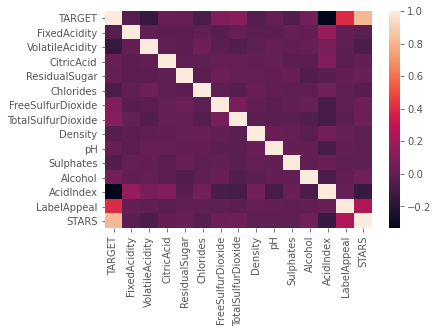

In [37]:
# for printing heatmap
print(sns.heatmap(P1_filled.corr()))

The heatmap of the predicted model has very similar correlation to our training data set which is a good indication of the model imputation.

## 7. Conclusion



1. The EDA identified flaws in the data, such as missing data and negative values where it doesn't make sense. We first address these issues with multiple methods such as imputing values and KNN.
2. The backwards selection method produced better performing models than PCA.
3. All 3 models with the backwards selection approach have similar RMSE values. With the multiple linear regression having the best RMSE at 1.35. 
4. The evaluation of the linear regression model produces negative target values. This is not a valid target. Therefore, we choose the negative binomial model as the next best. According to the chi squared test, the p value of the model did not show significant difference between the actual value distribution and our predicted value distribution. Furthermore, the variance of target is greater than mean of target, implying a negative binomial distribution is appropriate.
5. Finally, the TARGET column was imputed according to the negative binomial regression model.

### References
https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too<br>
http://srjcstaff.santarosa.edu/~jhenderson/Sulfur%20Dioxide.pdf<br>
https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e<br>
https://stackoverflow.com/questions/50929181/get-dummies-for-ordinal-variables-and-change-column-names-automatically<br>
https://stats.stackexchange.com/questions/195246/how-to-handle-ordinal-categorical-variable-as-independent-variable<br>
https://www.youtube.com/watch?v=KFuEAGR3HS4<br>
https://timeseriesreasoning.com/contents/poisson-regression-model/<br>
https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html<br>
https://www.socscistatistics.com/pvalues/chidistribution.aspx<br>
https://www.jmp.com/en_us/statistics-knowledge-portal/chi-square-test/chi-square-goodness-of-fit-test.html<br>
https://stats.idre.ucla.edu/stata/output/negative-binomial-regression/<br>
https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4<br>
https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.NegativeBinomial.html<br>
https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/<br>
https://rstudio-pubs-static.s3.amazonaws.com/390130_f18905cdac2f4a65be14d1daeeb99c65.html


